## One-shot code gneration with EBNF RAG document

### Approach Outline:
Step 1: Preprocess the Grammar:

Parse the EBNF grammar from Markdown to extract the grammar rules.

Use a tool (like ANTLR, PEG.js, or Lark) to convert the grammar into a formal parse tree.

Step 2: Use the LLM for One-Shot Example:

Provide a one-shot example and the grammar as context to the LLM via RAG.

Let the LLM generate the new code based on this example and the grammar.

Step 3: Parse the Generated Code:

Parse the generated code using the same parser or grammar engine used in Step 1.

Check if the parsed structure matches the grammar and if the syntax is valid.

Step 4: Validation:

If the generated code matches the expected parse tree based on the grammar, it follows the grammar correctly.

If not, provide feedback to refine the generation.


In [ ]:
!pip install lark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
from lark import Lark

# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()

In [ ]:
# Step 4: Test the parser with an example input
input_str = """vocabulary <http://example.com/auto-tracking#> as auto {
    extends <http://www.w3.org/2001/XMLSchema#> as xsd
    extends <http://purl.org/dc/elements/1.1/> as dc

    @dc:description "The base aspect for all identified elements in the auto tracking system"
    aspect IdentifiedElement [
        key hasId
    ]

    @dc:description "The ID property for all identified elements"
    scalar property hasId [
        domain IdentifiedElement
        range xsd:string
        functional
    ]

    @dc:description "Name property for named entities"
    scalar property hasName [
        domain NamedEntity
        range xsd:string
        functional
    ]

    @dc:description "Date property for timestamped entities"
    scalar property hasDate [
        domain TimestampedEntity
        range xsd:date
        functional
    ]

    @dc:description "Description property"
    scalar property hasDescription [
        domain DescribedEntity
        range xsd:string
        functional
    ]

    @dc:description "Cost property for services"
    scalar property hasCost [
        domain Service
        range xsd:decimal
        functional
    ]

    @dc:description "Base aspect for entities with names"
    aspect NamedEntity < IdentifiedElement

    @dc:description "Base aspect for entities with timestamps"
    aspect TimestampedEntity < IdentifiedElement

    @dc:description "Base aspect for entities with descriptions"
    aspect DescribedEntity < IdentifiedElement

    @dc:description "Person who owns cars"
    concept Person < NamedEntity [
        restricts all owns to Vehicle
    ]

    @dc:description "A vehicle that can be owned and maintained"
    concept Vehicle < NamedEntity, DescribedEntity [
        restricts all isOwnedBy to Person
        restricts all hasMaintenanceRecord to MaintenanceRecord
    ]

    @dc:description "A specific type of vehicle"
    concept Car < Vehicle [
        restricts makeModel to exactly 1
        restricts year to exactly 1
        restricts licensePlate to exactly 1
    ]

    @dc:description "A maintenance record for a vehicle"
    concept MaintenanceRecord < IdentifiedElement, TimestampedEntity, DescribedEntity [
        restricts all isMaintenanceFor to Vehicle
        restricts all includes to Service
    ]

    @dc:description "A service performed during maintenance"
    concept Service < IdentifiedElement, DescribedEntity [
        restricts all isIncludedIn to MaintenanceRecord
        restricts hasCost to exactly 1
    ]

    @dc:description "Vehicle make and model"
    scalar property makeModel [
        domain Vehicle
        range xsd:string
        functional
    ]

    @dc:description "Vehicle year of manufacture"
    scalar property year [
        domain Vehicle
        range xsd:gYear
        functional
    ]

    @dc:description "Vehicle license plate"
    scalar property licensePlate [
        domain Vehicle
        range xsd:string
        functional
    ]

    @dc:description "Vehicle mileage at time of service"
    scalar property mileage [
        domain MaintenanceRecord
        range xsd:integer
        functional
    ]

    @dc:description "Ownership relation between person and vehicle"
    relation owns [
        from Person
        to Vehicle
        reverse isOwnedBy
    ]

    @dc:description "Relation between vehicle and its maintenance records"
    relation hasMaintenanceRecord [
        from Vehicle
        to MaintenanceRecord
        reverse isMaintenanceFor
    ]

    @dc:description "Relation between maintenance record and included services"
    relation includes [
        from MaintenanceRecord
        to Service
        reverse isIncludedIn
    ]

    @dc:description "Rule to mark a vehicle as serviced recently if maintenance was done in the last 3 months"
    rule recentlyServiced [
        hasMaintenanceRecord(v, m) & hasDate(m, d) & lessThanMonths(d, currentDate(), 3) ->
        recentlyServiced(v)
    ]
}
"""

In [ ]:
from lark import Lark, UnexpectedInput

# Step 2: Define function to validate generated code against Lark grammar
def validate_code_against_grammar(code, grammar):
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

    try:
        # Parse the generated code
        tree = parser.parse(code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback

# Step 4: Validate the generated code
is_valid, result = validate_code_against_grammar(input_str, grammar)

if is_valid:
    print("Code follows the grammar correctly.")
else:
    print(f"Code does not follow the grammar. Error: {result}")

Code does not follow the grammar. Error: No terminal matches '(' in the current parser context, at line 135 col 83

te(m, d) & lessThanMonths(d, currentDate(), 3) -> 
                                        ^
Expected one of: 
	* COMMA
	* RPAR



In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
%xterm
 # curl https://ollama.ai/install.sh | sh
 # ollama serve & ollama pull mistral

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED      
mistral:latest    f974a74358d6    4.1 GB    7 seconds ago    


In [ ]:
!ollama pull mistral

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling ff82381e2bea:   0% ▕▏ 3.9 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   1% ▕▏  37 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   3% ▕▏ 112 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   4% ▕▏ 157 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   4% ▕▏ 180 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   5% ▕▏ 219 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   7% ▕▏ 289 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   8% ▕▏ 320 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:   9% ▕▏ 360 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:  10% ▕▏ 397 MB/4.1 GB                  pulling manifest 
pulling ff82381e2bea:

## Checking OML Grammar validity with Mistral

In [ ]:
!pip install ollama

In [ ]:
import json
import ollama
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

Loaded 97 entries


In [ ]:
# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97 to the database
A

In [ ]:
# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

In [ ]:
# Chatbot interaction
# Create an OML vocabulary for describing different types of vehicles
input_query = input('Ask me a question: ')
retrieved_knowledge = retrieve(input_query)

print('Retrieved knowledge:')
for output_text, similarity in retrieved_knowledge:
    print(f' - (similarity: {similarity:.2f}) {output_text}')

Ask me a question: Create an OML vocabulary for describing different types of vehicles
Retrieved knowledge:
 - (similarity: 0.58) @rdfs:label "types"\nvocabulary https://www.omg.org/spec/UML/PrimitiveTypes# as primitives {\n\textends http://www.w3.org/2000/01/rdf-schema# as rdfs\n\textends http://www.w3.org/2001/XMLSchema# as xsd\n\textends http://www.w3.org/2002/07/owl# as owl\n\t@rdfs:label "Boolean"\n\t@rdfs:comment "Boolean is used for logical expressions, consisting of the predefined values true and false."\n\tscalar Boolean = xsd:boolean\n\t@rdfs:label "Integer"\n\t@rdfs:comment "Integer is a primitive type representing integer values."\n\tscalar Integer = xsd:int\n\t@rdfs:label "Real"\n\t@rdfs:comment "Real is a primitive type representing the mathematical concept of real."\n\tscalar Real = owl:real\n\t@rdfs:label "UnlimitedNatural"\n\t@rdfs:comment "UnlimitedNatural is a primitive type representing unlimited natural values."\n\tscalar UnlimitedNatural = xsd:int\n\t@rdfs:label "

In [ ]:
# Construct the instruction prompt for the chatbot
instruction_prompt = '''You are a helpful chatbot.
Use only the following pieces of context to generate OML code.
Don't make up any new information about the structure and grammar of OML:
''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

In [ ]:
# Stream the chatbot's response using the Mistral model
stream = ollama.chat(
    model=LANGUAGE_MODEL,
    messages=[
        {'role': 'system', 'content': instruction_prompt},
        {'role': 'user', 'content': input_query},
    ],
    stream=True,
)

response_content = ""  # Variable to store the response content

# Print and capture chatbot response in real-time
for chunk in stream:
    message = chunk['message']['content']
    response_content += message  # Append the chunk to the variable
    print(message, end='', flush=True)  # Print immediately with flush

 Here is a simple OML vocabulary for describing different types of vehicles, extending the existing Sierra vocabularies and primitives. Please note that this is a basic structure and can be further expanded based on specific requirements.

```
vocabulary <http://yourdomain.com/vehicle#> as vehicle {
    extends <https://www.omg.org/spec/UML/PrimitiveTypes#> as primitives
    extends <http://opencaesar.io/sierra/base#> as base
    extends <http://opencaesar.io/sierra/component#> as component

    // Aspects
    aspect MovableElement [
        key hasVIN
    ]
    // Concepts
    concept Vehicle < base:ContainableElement, base:SpecializableElement, component:PresentingElement, MovableElement [
        restricts all base:contains to Vehicle
        restricts all base:isContainedBy to Vehicle
        restricts all base:specializes to Vehicle
        restricts all base:isSpecializedBy to Vehicle
    ]
    concept Car < Vehicle [
        // Additional properties or relations specific to cars

In [ ]:
# At the end, the full content will be stored in response_content
print("\nFull response content captured:")
print(response_content)


Full response content captured:
 Here is a simple OML vocabulary for describing different types of vehicles, extending the existing Sierra vocabularies and primitives. Please note that this is a basic structure and can be further expanded based on specific requirements.

```
vocabulary <http://yourdomain.com/vehicle#> as vehicle {
    extends <https://www.omg.org/spec/UML/PrimitiveTypes#> as primitives
    extends <http://opencaesar.io/sierra/base#> as base
    extends <http://opencaesar.io/sierra/component#> as component

    // Aspects
    aspect MovableElement [
        key hasVIN
    ]
    // Concepts
    concept Vehicle < base:ContainableElement, base:SpecializableElement, component:PresentingElement, MovableElement [
        restricts all base:contains to Vehicle
        restricts all base:isContainedBy to Vehicle
        restricts all base:specializes to Vehicle
        restricts all base:isSpecializedBy to Vehicle
    ]
    concept Car < Vehicle [
        // Additional propert

In [ ]:
import re

def extract_code(response):
  pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'

  # Search for the pattern in the response
  match = re.search(pattern, response, re.DOTALL)

  if match:
    # Extract the code block and return it
    return match.group(1)
  else:
    return None

In [ ]:
oml_code = extract_code(response_content)
if oml_code:
  print("Extracted OML code:")
  print(oml_code)
else:
  print("No OML code found in the response.")

Extracted OML code:
vocabulary <http://yourdomain.com/vehicle#> as vehicle {
    extends <https://www.omg.org/spec/UML/PrimitiveTypes#> as primitives
    extends <http://opencaesar.io/sierra/base#> as base
    extends <http://opencaesar.io/sierra/component#> as component

    // Aspects
    aspect MovableElement [
        key hasVIN
    ]
    // Concepts
    concept Vehicle < base:ContainableElement, base:SpecializableElement, component:PresentingElement, MovableElement [
        restricts all base:contains to Vehicle
        restricts all base:isContainedBy to Vehicle
        restricts all base:specializes to Vehicle
        restricts all base:isSpecializedBy to Vehicle
    ]
    concept Car < Vehicle [
        // Additional properties or relations specific to cars
    ]
    concept Truck < Vehicle [
        // Additional properties or relations specific to trucks
    ]
    concept Motorcycle < Vehicle [
        // Additional properties or relations specific to motorcycles
    ]

    

In [ ]:
# Step 4: Validate the generated code
is_valid, result = validate_code_against_grammar(oml_code, grammar)

if is_valid:
    print("Code follows the grammar correctly.")
else:
    print(f"Code does not follow the grammar. Error: {result}")

Code follows the grammar correctly.


## Agent Feedback loop

**Part 1:** Prompting RAG-backed LLM with 5 zero-shot prompts about generating OML code for the prompt:
```
Create an OML vocabulary for describing different types of vehicles
```

Here, the approach is kept simple. Does providing 97 examples in the RAG file just showing the examples ever generate completely grammar-following code?

To answer that, I tried prompting it the same prompt every single time there was an error with the code generated.

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED      
mistral:latest    f974a74358d6    4.1 GB    9 minutes ago    


In [ ]:
# Create an OML vocabulary for describing different types of vehicles

import json
import ollama
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

# Recursive function to check OML code validity and regenerate it if necessary
def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1):
    retrieved_knowledge = retrieve(input_query)

    # Construct the instruction prompt for the chatbot
    instruction_prompt = '''You are a helpful chatbot.
    Use only the following pieces of context to generate OML code.
    Don't make up any new information about the structure and grammar of OML:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Stream the chatbot's response using the Mistral model
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""  # Variable to store the response content

    # Print and capture chatbot response in real-time
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message  # Append the chunk to the variable
        print(message, end='', flush=True)  # Print immediately with flush

    # Extract the OML code
    oml_code = extract_code(response_content)
    if oml_code:
        # Validate the code against the OML grammar
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Recursive feedback loop to regenerate the code
            if recursion_level < max_recursions:
                print(f"\nAttempting to regenerate OML code (recursion {recursion_level + 1})...")
                return provide_feedback_and_regenerate(input_query, grammar, max_recursions, recursion_level + 1)
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED       
mistral:latest    f974a74358d6    4.1 GB    16 minutes ago    


**Part 2:** Prompting RAG-backed LLM with 5 prompts about generating OML code for the prompt:
```
Create an OML vocabulary for describing different types of vehicles
```
Here, I tried to maintain the session, and revert back to the LLM specifying the code and the grammatical error the code had. If a coherent code is generated, more example adoption and an agentic approach may be feasible.

In [ ]:
# Create an OML vocabulary for describing different types of vehicles

import json
import ollama
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

# Recursive function to check OML code validity and regenerate it if necessary
def provide_feedback_and_regenerate(input_query, grammar, session_history=None, max_recursions=5, recursion_level=1):
    if session_history is None:
        session_history = []  # Initialize session history if it's the first recursion

    # Retrieve knowledge and prepare the context for the prompt
    retrieved_knowledge = retrieve(input_query)

    # Construct the instruction prompt for the chatbot, including the error message from previous recursion
    instruction_prompt = '''You are a helpful chatbot.
    Use only the following pieces of context to generate OML code.
    Don't make up any new information about the structure and grammar of OML:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add previous OML code and error message to the instruction if in recursion
    if session_history:
        for i, (code, error) in enumerate(session_history):
            instruction_prompt += f"\n\nAttempt {i+1}:\nOML Code: {code}\nError: {error}"

    # Stream the chatbot's response using the Mistral model
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[{'role': 'system', 'content': instruction_prompt},
                  {'role': 'user', 'content': input_query}],
        stream=True,
    )

    response_content = ""  # Variable to store the response content

    # Print and capture chatbot response in real-time
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message  # Append the chunk to the variable
        print(message, end='', flush=True)  # Print immediately with flush

    # Extract the OML code
    oml_code = extract_code(response_content)
    if oml_code:
        # Validate the code against the OML grammar
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Add the current OML code and error to session history for future recursion
            session_history.append((oml_code, result))

            # Recursive feedback loop to regenerate the code
            if recursion_level < max_recursions:
                print(f"\nAttempting to regenerate OML code (recursion {recursion_level + 1})...")
                return provide_feedback_and_regenerate(input_query, grammar, session_history, max_recursions, recursion_level + 1)
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

**Step 3**: Modifying the feedback prompt so that Mistral comprehends the error message correctly

In [ ]:
import re

def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

In [ ]:
error_message = """
No terminal matches 'C' in the current parser context, at line 28 col 5

    Class AutoPart {
    ^
Expected one of:
	* COMMA
	* __ANON_3
	* RELATION
	* AT
	* RULE
	* __ANON_0
	* ANNOTATION
	* ASPECT
	* BUILTIN
	* DOLLAR
	* SCALAR
	* CONCEPT
"""

parse_error_details(error_message)

('28',
 '5',
 'C',
 'COMMA, __ANON_3, RELATION, AT, RULE, __ANON_0, ANNOTATION, ASPECT, BUILTIN, DOLLAR, SCALAR, CONCEPT')

In [ ]:
def format_debugging_prompt(code, error_message):
    """
    Formats the structured debugging prompt for the LLM.
    """
    # Extract details from error message
    line_number, column_number, unexpected_token, expected_tokens = parse_error_details(error_message)

    # Construct a structured debugging prompt
    debugging_prompt = f"""
    The generated OML code contains a syntax error.

    ### Attempted Code:
    ```oml
    {code}
    ```

    ### Error Details:
    - **Location:** Line {line_number}, Column {column_number}
    - **Unexpected Token:** '{unexpected_token}'
    - **Expected Tokens:** {expected_tokens}

    ### Explanation:
    The parser encountered an issue at **Line {line_number}, Column {column_number}**, where it found **'{unexpected_token}'**,
    but expected one of the following valid constructs: {expected_tokens}.

    ### Possible Fix:
    - Check for **missing or misplaced symbols**.
    - Ensure **proper usage of expected tokens** in this context.
    - Modify the structure so that it conforms to OML syntax.

    Please **correct the OML code** based on this information and generate a valid version.
    """

    return debugging_prompt

In [ ]:
format_debugging_prompt(oml_code, error_message)

"\n    The generated OML code contains a syntax error.\n\n    ### Attempted Code:\n    ```oml\n    vocabulary <http://yourdomain.com/vehicle#> as vehicle {\n    extends <https://www.omg.org/spec/UML/PrimitiveTypes#> as primitives\n    extends <http://opencaesar.io/sierra/base#> as base\n    extends <http://opencaesar.io/sierra/component#> as component\n\n    // Aspects\n    aspect MovableElement [\n        key hasVIN\n    ]\n    // Concepts\n    concept Vehicle < base:ContainableElement, base:SpecializableElement, component:PresentingElement, MovableElement [\n        restricts all base:contains to Vehicle\n        restricts all base:isContainedBy to Vehicle\n        restricts all base:specializes to Vehicle\n        restricts all base:isSpecializedBy to Vehicle\n    ]\n    concept Car < Vehicle [\n        // Additional properties or relations specific to cars\n    ]\n    concept Truck < Vehicle [\n        // Additional properties or relations specific to trucks\n    ]\n    concept Mot

In [ ]:
# Create an OML vocabulary for a store selling auto parts

import json
import ollama
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    retrieved_knowledge = retrieve(input_query)

    instruction_prompt = '''You are an OML code generation assistant.
    Use only the following context to generate syntactically correct OML code:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add structured debugging feedback if this is not the first attempt
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n\n" + debugging_prompt

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    oml_code = extract_code(response_content)

    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats the structured debugging prompt for the LLM.
    """
    # Extract details from error message
    line_number, column_number, unexpected_token, expected_tokens = parse_error_details(error_message)

    # Construct a structured debugging prompt
    debugging_prompt = f"""
    The generated OML code contains a syntax error.

    ### Attempted Code:
    ```oml
    {code}
    ```

    ### Error Details:
    - **Location:** Line {line_number}, Column {column_number}
    - **Unexpected Token:** '{unexpected_token}'
    - **Expected Tokens:** {expected_tokens}

    ### Explanation:
    The parser encountered an issue at **Line {line_number}, Column {column_number}**, where it found **'{unexpected_token}'**,
    but expected one of the following valid constructs: {expected_tokens}.

    ### Possible Fix:
    - Check for **missing or misplaced symbols**.
    - Ensure **proper usage of expected tokens** in this context.
    - Modify the structure so that it conforms to OML syntax.

    Please **correct the OML code** based on this information and generate a valid version.
    """

    return debugging_prompt

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

### Trying with different instruction for recursive feedback specifying error

In [ ]:
# Create an OML vocabulary for describing different types of vehicles

import json
import ollama
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    retrieved_knowledge = retrieve(input_query)

    instruction_prompt = '''You are an OML code generation assistant.
    Use only the following context to generate syntactically correct OML code:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add structured debugging feedback if this is not the first attempt
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n\n" + debugging_prompt

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    oml_code = extract_code(response_content)

    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate a valid version.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) before special symbols like '{' or '('.
    """
    match = re.match(r"^\s*(\w+)", error_line)
    return match.group(1) if match else None

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

def enhance_error_feedback(error_message, grammar_text):
    """Extract expected tokens from the error and fetch their grammar rule definitions."""
    matches = re.findall(r'\* (\w+)', error_message)  # Extract all expected tokens

    if matches:
        rule_definitions = "\n\n".join(
            [f"**{token}:** {get_grammar_rule(grammar_text, token)}" for token in matches]
        )
        return f"{error_message}\n\n### Grammar Definitions:\n{rule_definitions}"

    return error_message  # Return as is if no expected tokens are found

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED       
mistral:latest    f974a74358d6    4.1 GB    41 minutes ago    


Different Prompt used.

In [ ]:
# Design a vocabulary for a library management system

import json
import ollama
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most relevant outputs
    return similarities[:top_n]

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    retrieved_knowledge = retrieve(input_query)

    instruction_prompt = '''You are an OML code generation assistant.
    Use only the following context to generate syntactically correct OML code:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add structured debugging feedback if this is not the first attempt
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n\n" + debugging_prompt

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    oml_code = extract_code(response_content)

    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate a valid version.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) before special symbols like '{' or '('.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

## Modifying Prompt and changing instructions to include {} error as well as extension error (most commonly occurring ones)

In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]  # Use SentenceTransformer for input embedding
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]  # Use SentenceTransformer for output embedding
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]  # Get embedding for the query (input part)
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)  # Compare with input embeddings
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {output_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    retrieved_knowledge = retrieve(input_query)

    instruction_prompt = '''You are an OML code generation assistant.
    Use only the following context to generate syntactically correct OML code:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add structured debugging feedback if this is not the first attempt
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n\n" + debugging_prompt

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    oml_code = extract_code(response_content)

    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

### Changing tokenizer usage to use Tiktoken for setting context window limits

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED    
mistral:latest    f974a74358d6    4.1 GB    2 hours ago    


In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.6 MB/s eta 0:00:00


In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    retrieved_knowledge = retrieve(input_query)

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse only the following context to generate syntactically correct OML code:\n'

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        # Truncate each chunk
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    oml_code = extract_code(response_content)

    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

## Trying the Vocabulary restriction logic

In [ ]:
import os
import re

def extract_workspace_vocabularies(directory):
    available_vocabularies = set([
        "dc", "rdf", "rdfs", "xsd", "owl", "swrlb"  # Core vocabularies (always available)
    ])

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    for line in content:
                        match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if match:
                            available_vocabularies.add(match.group(2))

    return available_vocabularies

import re

def check_vocabularies(prompt, directory):
    available_vocabularies = extract_workspace_vocabularies(directory)
    core_vocabularies = {"dc", "rdf", "rdfs", "xsd", "owl", "swrlb"}
    ignore_words = {"and", "with", "for", "the", "a", "an", "using", "vocabularies", "vocabulary"}

    if "extends" not in prompt:
        return {"allowed": core_vocabularies, "missing": set()}

    # Extract vocabularies after 'extends'
    match = re.search(r'extends\s+(.+)', prompt)
    if match:
        vocab_part = match.group(1)
        requested_vocabularies = {v.lower() for v in re.findall(r'\b[a-zA-Z0-9_]+\b', vocab_part)}

        # Remove common English words
        requested_vocabularies -= ignore_words

        missing_vocabularies = requested_vocabularies - available_vocabularies
        allowed_vocabularies = requested_vocabularies.intersection(available_vocabularies)

        return {
            "allowed": allowed_vocabularies.union(core_vocabularies),
            "missing": missing_vocabularies
        }

    return {"allowed": set(), "missing": set()}


# Example usage
directory = "/content/OML-codes"
prompt = "Create a new vocabulary for musical instruments that extends base, dc, rdfs and owl vocabularies"
result = check_vocabularies(prompt, directory)

print("Allowed Vocabularies:", result["allowed"])
if result["missing"]:
    print("Missing Vocabularies:", result["missing"], "- Please import/download them before prompting again.")

Allowed Vocabularies: {'dc', 'swrlb', 'rdf', 'rdfs', 'owl', 'xsd'}
Missing Vocabularies: {'base'} - Please import/download them before prompting again.


## Integration Attempt #1

In [ ]:
!pip install ollama tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.3 MB/s eta 0:00:00


In [ ]:
!ollama list

/bin/bash: line 1: ollama: command not found


In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabularies(directory):
    available_vocabularies = set([
        "dc", "rdf", "rdfs", "xsd", "owl", "swrlb"  # Core vocabularies (always available)
    ])

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    for line in content:
                        match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if match:
                            available_vocabularies.add(match.group(2))

    return available_vocabularies

import re

def check_vocabularies(prompt, directory):
    available_vocabularies = extract_workspace_vocabularies(directory)
    core_vocabularies = {"dc", "rdf", "rdfs", "xsd", "owl", "swrlb"}
    ignore_words = {"and", "with", "for", "the", "a", "an", "using", "vocabularies", "vocabulary"}

    if "extends" not in prompt:
        return {"allowed": core_vocabularies, "missing": set()}

    # Extract vocabularies after 'extends'
    match = re.search(r'extends\s+(.+)', prompt)
    if match:
        vocab_part = match.group(1)
        requested_vocabularies = {v.lower() for v in re.findall(r'\b[a-zA-Z0-9_]+\b', vocab_part)}

        # Remove common English words
        requested_vocabularies -= ignore_words

        missing_vocabularies = requested_vocabularies - available_vocabularies
        allowed_vocabularies = requested_vocabularies.intersection(available_vocabularies)

        return {
            "allowed": allowed_vocabularies.union(core_vocabularies),
            "missing": missing_vocabularies
        }

    return {"allowed": set(), "missing": set()}


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # If missing vocabularies, print the feedback and return early
    if result["missing"]:
        print(f"Missing vocabularies: {', '.join(result['missing'])}. Please import them before proceeding.")
        return None
    else:
        allowed_vocabularies_str = ', '.join(result['allowed'])
        system_instruction = f"Generate OML code extending only the following vocabularies: {allowed_vocabularies_str}"
        final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse only the following context to generate syntactically correct OML code:\n'
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

## Integration Attempt #2: Uploading some OML vocabularies into the 'OML-codes' directory and checking vocabulary extension restrictions

In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabularies(directory):
    available_vocabularies = set([
        "dc", "rdf", "rdfs", "xsd", "owl", "swrlb"  # Core vocabularies (always available)
    ])

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    for line in content:
                        match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if match:
                            available_vocabularies.add(match.group(2))

    return available_vocabularies

import re

def check_vocabularies(prompt, directory):
    available_vocabularies = extract_workspace_vocabularies(directory)
    core_vocabularies = {"dc", "rdf", "rdfs", "xsd", "owl", "swrlb"}
    ignore_words = {"and", "with", "for", "the", "a", "an", "as", "well", "using", "vocabularies", "vocabulary"}

    if "extends" not in prompt:
        return {"allowed": core_vocabularies, "missing": set()}

    # Extract vocabularies after 'extends'
    match = re.search(r'extends\s+(.+)', prompt)
    if match:
        vocab_part = match.group(1)
        requested_vocabularies = {v.lower() for v in re.findall(r'\b[a-zA-Z0-9_]+\b', vocab_part)}

        # Remove common English words
        requested_vocabularies -= ignore_words

        missing_vocabularies = requested_vocabularies - available_vocabularies
        allowed_vocabularies = requested_vocabularies.intersection(available_vocabularies)

        return {
            "allowed": allowed_vocabularies.union(core_vocabularies),
            "missing": missing_vocabularies
        }

    return {"allowed": set(), "missing": set()}


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # If missing vocabularies, print the feedback and return early
    if result["missing"]:
        print(f"Missing vocabularies: {', '.join(result['missing'])}. Please import them before proceeding.")
        return None
    else:
        allowed_vocabularies_str = ', '.join(result['allowed'])
        system_instruction = f"Generate OML code extending only the following vocabularies: {allowed_vocabularies_str}"
        final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse only the following context to generate syntactically correct OML code:\n'
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword and (keyword in input_text or keyword in output_text):
            return output_text  # Return the first relevant example found

    return "No relevant example found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

## Dynamic RAG updates

In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabularies(directory):
    available_vocabularies = set([
        "dc", "rdf", "rdfs", "xsd", "owl", "swrlb"  # Core vocabularies (always available)
    ])

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    for line in content:
                        match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if match:
                            available_vocabularies.add(match.group(2))

    return available_vocabularies

import re

def check_vocabularies(prompt, directory):
    available_vocabularies = extract_workspace_vocabularies(directory)
    core_vocabularies = {"dc", "rdf", "rdfs", "xsd", "owl", "swrlb"}
    ignore_words = {"and", "with", "for", "the", "a", "an", "as", "well", "using", "vocabularies", "vocabulary"}

    if "extends" not in prompt:
        return {"allowed": core_vocabularies, "missing": set()}

    # Extract vocabularies after 'extends'
    match = re.search(r'extends\s+(.+)', prompt)
    if match:
        vocab_part = match.group(1)
        requested_vocabularies = {v.lower() for v in re.findall(r'\b[a-zA-Z0-9_]+\b', vocab_part)}

        # Remove common English words
        requested_vocabularies -= ignore_words

        missing_vocabularies = requested_vocabularies - available_vocabularies
        allowed_vocabularies = requested_vocabularies.intersection(available_vocabularies)

        return {
            "allowed": allowed_vocabularies.union(core_vocabularies),
            "missing": missing_vocabularies
        }

    return {"allowed": set(), "missing": set()}


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # If missing vocabularies, print the feedback and return early
    if result["missing"]:
        print(f"Missing vocabularies: {', '.join(result['missing'])}. Please import them before proceeding.")
        return None
    else:
        allowed_vocabularies_str = ', '.join(result['allowed'])
        system_instruction = f"Generate OML code extending only the following vocabularies: {allowed_vocabularies_str}"
        final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse only the following context to generate syntactically correct OML code:\n'
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword:
            # Check if keyword appears in the output_text (the OML code)
            for line in output_text.splitlines():
                if keyword in line:
                    return line.strip()  # Return the matching line

    return "No relevant line found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED       
mistral:latest    f974a74358d6    4.1 GB    59 minutes ago    


### Making the following changes:

1. Rather than assuming list of vocabs to be extended by default - checking for those vocabs to be present in workspace before proceeding. Basically, check for those which are present and available for extension for new vocabulary definition.
2. Not using the 'extends' keyword for filtering out vocabularies that can be extended - always checking for those available in workspace.

In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabularies(directory):
    available_vocabularies = set()

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    for line in content:
                        match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if match:
                            available_vocabularies.add(match.group(2))

    return available_vocabularies

import re

def check_vocabularies(prompt, directory):
    available_vocabularies = extract_workspace_vocabularies(directory)


    return {"allowed": available_vocabularies, "missing": set()}


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # Use all available vocabularies from the workspace
    allowed_vocabularies_str = ', '.join(result['allowed']) if result["allowed"] else "No vocabularies found in workspace"
    system_instruction = f"Generate OML code only using these vocabularies which are available in the workspace: {allowed_vocabularies_str}"
    final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse only the following context to generate syntactically correct OML code:\n'
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated feedback prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword:
            # Check if keyword appears in the output_text (the OML code)
            for line in output_text.splitlines():
                if keyword in line:
                    return line.strip()  # Return the matching line

    return "No relevant line found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

sentence_xlm-roberta_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97 to the database
A

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED       
mistral:latest    f974a74358d6    4.1 GB    11 minutes ago    


### New Modifications:
Providing not just the alias names extracted from the vocabularies in the workspace, but also their definitions so that the LLM has more contextual information for code generation.

In [ ]:
# Develop an OML vocabulary for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=1):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabulary_definitions(directory):
    """
    Extract detailed definitions of all available vocabularies from OML files in the workspace.
    Returns a dictionary mapping vocabulary IDs to their definitions.
    """
    vocabulary_definitions = {}
    current_vocabulary = None
    current_definition = []

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    in_vocabulary_block = False

                    for line in content:
                        # Check for vocabulary declaration
                        vocab_match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if vocab_match:
                            # Save previous vocabulary if there was one
                            if current_vocabulary and current_definition:
                                vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

                            # Start new vocabulary
                            current_vocabulary = vocab_match.group(2)
                            current_definition = [line]
                            in_vocabulary_block = True
                            continue

                        # Check for end of vocabulary block
                        if in_vocabulary_block and re.search(r'^\s*}\s*$', line):
                            current_definition.append(line)
                            vocabulary_definitions[current_vocabulary] = ''.join(current_definition)
                            in_vocabulary_block = False
                            current_vocabulary = None
                            current_definition = []
                            continue

                        # Add line to current definition if inside a vocabulary block
                        if in_vocabulary_block:
                            current_definition.append(line)

                    # Handle case where file ends while still in a vocabulary block
                    if current_vocabulary and current_definition:
                        vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

    return vocabulary_definitions

def check_vocabularies(prompt, directory):
    """
    Check what vocabularies are present in the workspace and extract their definitions.
    Returns a dictionary with allowed vocabularies and their definitions.
    """
    vocabulary_definitions = extract_workspace_vocabulary_definitions(directory)

    return {
        "allowed": set(vocabulary_definitions.keys()),
        "definitions": vocabulary_definitions,
        "missing": set()
    }


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # Use all available vocabularies from the workspace
    allowed_vocabularies_str = ', '.join(result['allowed']) if result["allowed"] else "No vocabularies found in workspace"
    # Create a prompt that includes vocabulary definitions
    system_instruction = "Generate complete and valid OML code based on the user's query. Use ONLY the following vocabularies available in the workspace:\n\n"

    # Add each vocabulary definition to the prompt (potentially truncating if too long)
    for vocab_name, definition in result["definitions"].items():
        truncated_definition = truncate_to_token_limit(definition, max_tokens=300)
        system_instruction += f"Vocabulary '{vocab_name}':\n{truncated_definition}\n\n"

    final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse the following context to generate syntactically correct OML code:\n'
    instruction_prompt += """Expected response format:
    ```oml
    vocabulary <http://example.org/vocab-def#> as vocab {
    // OML code here
    }```"""
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword:
            # Check if keyword appears in the output_text (the OML code)
            for line in output_text.splitlines():
                if keyword in line:
                    return line.strip()  # Return the matching line

    return "No relevant line found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries
Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED          
mistral:latest    f974a74358d6    4.1 GB    About an hour ago    


### Moving forward with a code generation LLM due to above generation errors

In [ ]:
!ollama pull codellama:7b-instruct

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 3a43f93b78ec...   0% ▕▏    0 B/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   0% ▕▏    0 B/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   0% ▕▏ 1.7 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   1% ▕▏  27 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   2% ▕▏  86 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   3% ▕▏ 122 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   4% ▕▏ 140 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   5% ▕▏ 176 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   5% ▕▏ 210 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   6% ▕▏ 228 MB/3.8 GB                  pulling manifest 
pulling 3a43f93b78ec...   8% ▕▏ 288 MB/

In [ ]:
!ollama list

NAME                     ID              SIZE      MODIFIED       
codellama:7b-instruct    8fdf8f752f6e    3.8 GB    17 seconds ago    


In [ ]:
!pip install ollama tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00


## Code workflow with Agentic Approach (Just how the below code works)

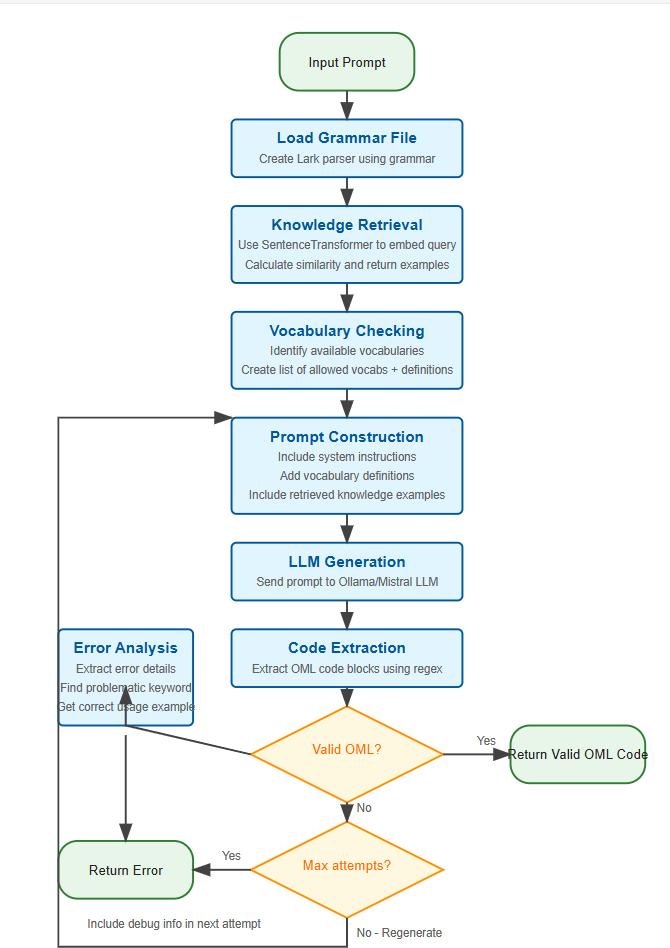

## User Experience Workflow with Agentic approach:

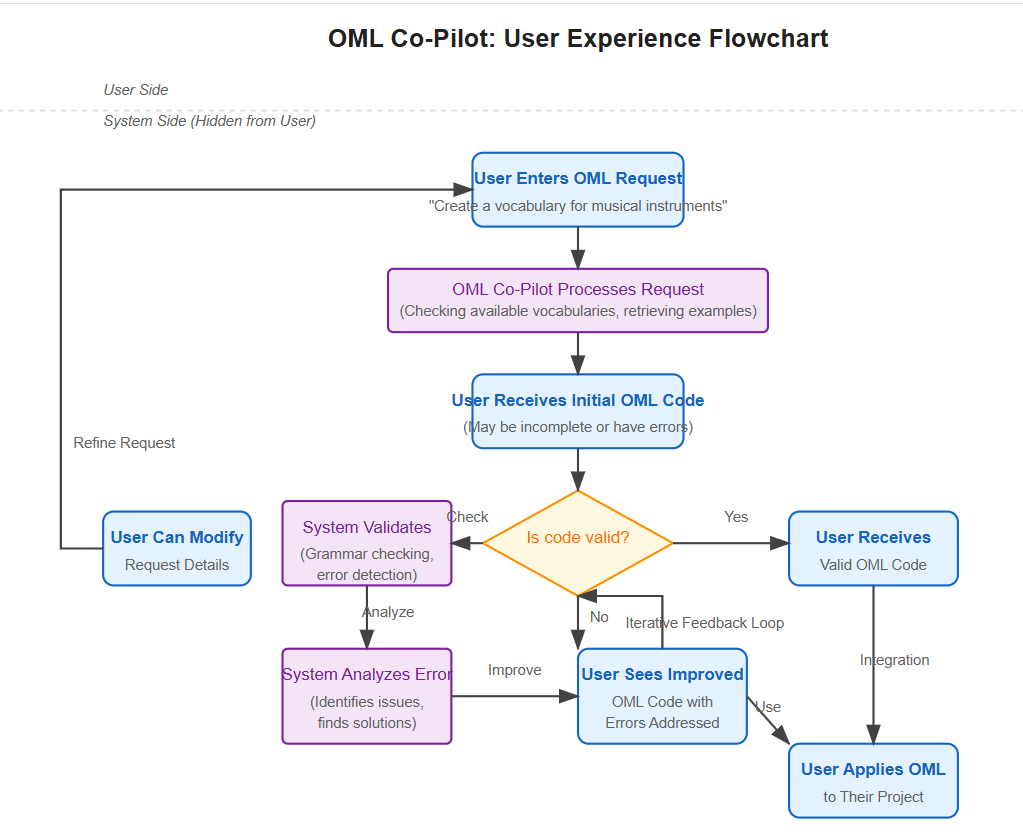

In [ ]:
# Generate OML vocabulary code for describing various types of musical instruments

import json
import ollama
import tiktoken
from sentence_transformers import SentenceTransformer
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load the JSONL dataset
dataset = []
with open('3.jsonl', 'r') as file:
    for line in file:
        dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer
LANGUAGE_MODEL = "codellama:7b-instruct"
MAX_TOKENS = 4096  # Mistral's context length limit

# VECTOR_DB to store input-output pairs and their embeddings
VECTOR_DB = []

def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
      truncated_tokens = tokens[:max_tokens]
      return TOKENIZER.decode(truncated_tokens)
    return text

def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Modify embedding to use E5 model's recommended format for embedding
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Add all input-output pairs from the dataset to the VECTOR_DB
for i, example in enumerate(dataset):
    add_chunk_to_database(example['input'], example['output'])
    print(f'Added example {i+1}/{len(dataset)} to the database')

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

def retrieve(query, top_n=3):
    """
    Modified retrieve function to work with new embedding model
    and respect token limits.
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]

import os
import re

def extract_workspace_vocabulary_definitions(directory):
    """
    Extract detailed definitions of all available vocabularies from OML files in the workspace.
    Returns a dictionary mapping vocabulary IDs to their definitions.
    """
    vocabulary_definitions = {}
    current_vocabulary = None
    current_definition = []

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    in_vocabulary_block = False

                    for line in content:
                        # Check for vocabulary declaration
                        vocab_match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if vocab_match:
                            # Save previous vocabulary if there was one
                            if current_vocabulary and current_definition:
                                vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

                            # Start new vocabulary
                            current_vocabulary = vocab_match.group(2)
                            current_definition = [line]
                            in_vocabulary_block = True
                            continue

                        # Check for end of vocabulary block
                        if in_vocabulary_block and re.search(r'^\s*}\s*$', line):
                            current_definition.append(line)
                            vocabulary_definitions[current_vocabulary] = ''.join(current_definition)
                            in_vocabulary_block = False
                            current_vocabulary = None
                            current_definition = []
                            continue

                        # Add line to current definition if inside a vocabulary block
                        if in_vocabulary_block:
                            current_definition.append(line)

                    # Handle case where file ends while still in a vocabulary block
                    if current_vocabulary and current_definition:
                        vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

    return vocabulary_definitions

def check_vocabularies(prompt, directory):
    """
    Check what vocabularies are present in the workspace and extract their definitions.
    Returns a dictionary with allowed vocabularies and their definitions.
    """
    vocabulary_definitions = extract_workspace_vocabulary_definitions(directory)

    return {
        "allowed": set(vocabulary_definitions.keys()),
        "definitions": vocabulary_definitions,
        "missing": set()
    }


def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # Use all available vocabularies from the workspace
    allowed_vocabularies_str = ', '.join(result['allowed']) if result["allowed"] else "No vocabularies found in workspace"
    # Create a prompt that includes vocabulary definitions
    system_instruction = "Generate complete and valid OML code based on the user's query. Use ONLY the following vocabularies available in the workspace:\n\n"

    # Add each vocabulary definition to the prompt (potentially truncating if too long)
    for vocab_name, definition in result["definitions"].items():
        truncated_definition = truncate_to_token_limit(definition, max_tokens=300)
        system_instruction += f"Vocabulary '{vocab_name}':\n{truncated_definition}\n\n"

    final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse the following context to generate syntactically correct OML code:\n'
    instruction_prompt += """Expected response format:
    ```oml
    vocabulary <http://example.org/vocab-def#> as vocab {
    // OML code here
    }```"""
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens

def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt by identifying the erroneous line, extracting the keyword,
    and retrieving a relevant example from RAG.
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt

def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.
    It assumes that the keyword is the first word (ignoring indentation) of the line.
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word

def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.
    """
    for input_text, output_text, _, _ in VECTOR_DB:  # Assuming VECTOR_DB contains example pairs
        if keyword:
            # Check if keyword appears in the output_text (the OML code)
            for line in output_text.splitlines():
                if keyword in line:
                    return line.strip()  # Return the matching line

    return "No relevant line found in the database. The keyword does not exist in OML."  # Fallback case

# Load the Lark grammar
with open("oml3_lark.txt", "r") as file:
    grammar_text = file.read()

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):

    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree (optional)
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    if oml_code and "valid" in oml_code:  # Example condition, modify as needed
        return True, "Valid OML code."
    else:
        return False, "OML code does not follow the grammar."

# Example usage
input_query = input('Ask me a question: ')
# Step 1: Read the grammar from a text file
with open("oml3_lark.txt", "r") as file:
    grammar = file.read()
    # Create the Lark parser using the grammar from the file
    parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

# Start the feedback and regeneration process
valid_code = provide_feedback_and_regenerate(input_query, grammar)
if valid_code:
    print("\nFinal valid OML code:")
    print(valid_code)

Loaded 97 entries


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

sentence_xlm-roberta_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Added example 1/97 to the database
Added example 2/97 to the database
Added example 3/97 to the database
Added example 4/97 to the database
Added example 5/97 to the database
Added example 6/97 to the database
Added example 7/97 to the database
Added example 8/97 to the database
Added example 9/97 to the database
Added example 10/97 to the database
Added example 11/97 to the database
Added example 12/97 to the database
Added example 13/97 to the database
Added example 14/97 to the database
Added example 15/97 to the database
Added example 16/97 to the database
Added example 17/97 to the database
Added example 18/97 to the database
Added example 19/97 to the database
Added example 20/97 to the database
Added example 21/97 to the database
Added example 22/97 to the database
Added example 23/97 to the database
Added example 24/97 to the database
Added example 25/97 to the database
Added example 26/97 to the database
Added example 27/97 to the database
Added example 28/97 to the database
A

## Modifying above code to be more understandable

In [ ]:
"""
OML Co-Pilot: AI-Assisted Ontological Modeling Language Code Generator
-------------------------------------------------------------------
This tool uses a Retrieval-Augmented Generation (RAG) approach to generate
valid OML (Ontological Modeling Language) code from natural language requests.
The system integrates grammar validation and an iterative feedback mechanism
to correct syntax errors in generated code.
"""

import json
import ollama
import tiktoken
import os
import re
from sentence_transformers import SentenceTransformer
from lark import Lark  # Imported but not shown in original code snippet
from lark.exceptions import UnexpectedInput
from sklearn.metrics.pairwise import cosine_similarity


#######################################################################
# CONFIGURATION AND INITIALIZATION
#######################################################################

# Constants
MAX_TOKENS = 4096  # Context length limit for LLM
LANGUAGE_MODEL = "codellama:7b-instruct"

# Initialize the tokenizer for context length management
TOKENIZER = tiktoken.get_encoding("cl100k_base")  # OpenAI tokenizer

# Initialize embedding model for semantic similarity
EMBEDDING_MODEL = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

# Vector database to store examples and their embeddings
VECTOR_DB = []


#######################################################################
# DATA LOADING AND PREPROCESSING
#######################################################################

def load_examples_dataset(file_path):
    """
    Load examples from a JSONL file into the in-memory database.

    Args:
        file_path (str): Path to the JSONL file containing examples

    Returns:
        list: The loaded dataset
    """
    dataset = []
    with open(file_path, 'r') as file:
        for line in file:
            dataset.append(json.loads(line))
    print(f'Loaded {len(dataset)} entries')
    return dataset


def preprocess_data(dataset):
    """
    Process the examples dataset and add to vector database with embeddings.

    Args:
        dataset (list): List of example dictionaries
    """
    for i, example in enumerate(dataset):
        add_chunk_to_database(example['input'], example['output'])
        print(f'Added example {i+1}/{len(dataset)} to the database')


def add_chunk_to_database(input_text, output_text):
    """
    Add input-output pairs to the database with embeddings,
    ensuring token limit is respected.

    Args:
        input_text (str): The query/input part of the example
        output_text (str): The OML code output part of the example
    """
    # Truncate texts to fit token limit
    input_text = truncate_to_token_limit(input_text)
    output_text = truncate_to_token_limit(output_text)

    # Generate embeddings using E5 model's recommended format
    input_embedding = EMBEDDING_MODEL.encode(f"query: {input_text}")
    output_embedding = EMBEDDING_MODEL.encode(f"passage: {output_text}")

    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))


def truncate_to_token_limit(text, max_tokens=MAX_TOKENS):
    """
    Truncate text to fit within the specified token limit.

    Args:
        text (str): Input text to truncate
        max_tokens (int): Maximum number of tokens allowed

    Returns:
        str: Truncated text
    """
    tokens = TOKENIZER.encode(text)
    if len(tokens) > max_tokens:
        truncated_tokens = tokens[:max_tokens]
        return TOKENIZER.decode(truncated_tokens)
    return text


#######################################################################
# RETRIEVAL AND SIMILARITY SEARCH
#######################################################################

def cosine_similarity(a, b):
    """
    Calculate cosine similarity between two vectors.

    Args:
        a (numpy.array): First embedding vector
        b (numpy.array): Second embedding vector

    Returns:
        float: Cosine similarity score (0-1)
    """
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)


def retrieve(query, top_n=3):
    """
    Retrieve most relevant examples for a given query.

    Args:
        query (str): User input query
        top_n (int): Number of examples to retrieve

    Returns:
        list: Top matching examples with similarity scores
    """
    # Truncate query to token limit
    query = truncate_to_token_limit(query)

    # Use E5 model's query format for embedding
    query_embedding = EMBEDDING_MODEL.encode(f"query: {query}")

    # Calculate similarity with all examples
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        # Calculate similarity
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the retrieved RAGs for debugging
    print("\nRetrieved RAGs:")
    for i, (output_text, similarity) in enumerate(similarities[:top_n]):
        # Truncate output for display
        display_text = truncate_to_token_limit(output_text, max_tokens=100)
        print(f"Rank {i+1}: Similarity = {similarity:.4f} -> {display_text}")

    # Return the top N most relevant outputs
    return similarities[:top_n]


#######################################################################
# VOCABULARY MANAGEMENT
#######################################################################

def extract_workspace_vocabulary_definitions(directory):
    """
    Extract detailed definitions of all available vocabularies from OML files in the workspace.

    Args:
        directory (str): Path to the directory containing OML files

    Returns:
        dict: Dictionary mapping vocabulary IDs to their definitions
    """
    vocabulary_definitions = {}
    current_vocabulary = None
    current_definition = []

    if os.path.exists(directory):
        for file in os.listdir(directory):
            if file.endswith(".oml"):
                with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                    content = f.readlines()
                    in_vocabulary_block = False

                    for line in content:
                        # Check for vocabulary declaration
                        vocab_match = re.search(r'vocabulary <(.+?)> as (\w+)', line)
                        if vocab_match:
                            # Save previous vocabulary if there was one
                            if current_vocabulary and current_definition:
                                vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

                            # Start new vocabulary
                            current_vocabulary = vocab_match.group(2)
                            current_definition = [line]
                            in_vocabulary_block = True
                            continue

                        # Check for end of vocabulary block
                        if in_vocabulary_block and re.search(r'^\s*}\s*$', line):
                            current_definition.append(line)
                            vocabulary_definitions[current_vocabulary] = ''.join(current_definition)
                            in_vocabulary_block = False
                            current_vocabulary = None
                            current_definition = []
                            continue

                        # Add line to current definition if inside a vocabulary block
                        if in_vocabulary_block:
                            current_definition.append(line)

                    # Handle case where file ends while still in a vocabulary block
                    if current_vocabulary and current_definition:
                        vocabulary_definitions[current_vocabulary] = ''.join(current_definition)

    return vocabulary_definitions


def check_vocabularies(prompt, directory):
    """
    Check what vocabularies are present in the workspace and extract their definitions.

    Args:
        prompt (str): User prompt for generation
        directory (str): Path to the workspace directory

    Returns:
        dict: Information about allowed vocabularies and their definitions
    """
    vocabulary_definitions = extract_workspace_vocabulary_definitions(directory)

    return {
        "allowed": set(vocabulary_definitions.keys()),
        "definitions": vocabulary_definitions,
        "missing": set()
    }


#######################################################################
# CODE GENERATION AND VALIDATION
#######################################################################

def extract_code(response):
    """
    Extract the OML code block from the LLM response.

    Args:
        response (str): Raw LLM response text

    Returns:
        str: Extracted OML code or None if no code block found
    """
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[a-zA-Z]+)?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None


def validate_code_against_grammar(oml_code, grammar):
    """
    Validate generated OML code against the grammar.

    Args:
        oml_code (str): Generated OML code
        grammar (str): OML grammar definition

    Returns:
        tuple: (is_valid, result) where is_valid is a boolean and result is either
               the parse tree or error message
    """
    try:
        # Parse the generated code
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, return the parse tree
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback


#######################################################################
# ERROR HANDLING AND FEEDBACK
#######################################################################

def parse_error_details(error_message):
    """
    Extracts key details from the OML parser error message.

    Args:
        error_message (str): Error message from grammar parser

    Returns:
        tuple: (line_number, column_number, unexpected_token, expected_tokens)
    """
    # Extract line and column number
    line_col_match = re.search(r'at line (\d+) col (\d+)', error_message)
    line_number, column_number = line_col_match.groups() if line_col_match else ("Unknown", "Unknown")

    # Extract unexpected token (e.g., 'C' in "No terminal matches 'C'")
    unexpected_token_match = re.search(r"No terminal matches '(.+?)'", error_message)
    unexpected_token = unexpected_token_match.group(1) if unexpected_token_match else "Unknown"

    # Extract expected tokens list
    expected_tokens_match = re.findall(r'\* (\w+)', error_message)
    expected_tokens = ", ".join(expected_tokens_match) if expected_tokens_match else "Unknown"

    return line_number, column_number, unexpected_token, expected_tokens


def extract_keyword(error_line):
    """
    Extracts the likely keyword from an erroneous line in the OML code.

    Args:
        error_line (str): The line containing an error

    Returns:
        str: The extracted keyword
    """
    # Extract the first word from the line (before the first space)
    first_word = error_line.strip().split(" ")[0]
    return first_word


def retrieve_example_using_keyword(keyword):
    """
    Fetches an example statement from RAG that correctly uses the specified keyword.

    Args:
        keyword (str): The keyword to find examples for

    Returns:
        str: An example line using the keyword correctly
    """
    for input_text, output_text, _, _ in VECTOR_DB:
        if keyword:
            # Check if keyword appears in the output_text (the OML code)
            for line in output_text.splitlines():
                if keyword in line:
                    return line.strip()  # Return the matching line

    return "No relevant line found in the database. The keyword does not exist in OML."


def format_debugging_prompt(code, error_message):
    """
    Formats a structured debugging prompt with error analysis and examples.

    Args:
        code (str): The erroneous OML code
        error_message (str): The error message from validation

    Returns:
        str: A formatted debugging prompt
    """
    # Extract details from the error message
    line_number, _, _, _ = parse_error_details(error_message)

    # Extract the erroneous line from the OML code
    code_lines = code.split("\n")
    error_line = code_lines[int(line_number) - 1] if line_number.isdigit() and int(line_number) <= len(code_lines) else "Unknown"

    # Extract the keyword (assuming it's the first word before any '{' or other special symbols)
    keyword = extract_keyword(error_line)

    # Retrieve an example from RAG that correctly uses the extracted keyword
    example_statement = retrieve_example_using_keyword(keyword) if keyword else "No relevant example found."

    debugging_prompt = f"""
    {error_message}  # First-line error message as is

    ### Erroneous Code:
    ```oml
    {error_line}
    ```

    ### Suggested Fix:
    Ensure that {{}} are only used for the overall vocabulary definitions, and for no other subpart definition of the vocabulary.
    Check and ensure that all extensions are properly formatted to follow the correct schema, like: extends <link> as id
    Also, ensure that whenever a 'concept' is defined - there is no '>' bracket following the '<' bracket which shows dependency.
    Any comments you need to put in the code body should be followed by the '//' symbol.
    The issue is likely due to incorrect usage of the **{keyword}** keyword. Here's an example of correct usage:

    ```oml
    {example_statement}
    ```

    Adjust the structure accordingly and regenerate valid OML Code.
    """

    return debugging_prompt


#######################################################################
# MAIN GENERATION WORKFLOW
#######################################################################

def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1, previous_oml_code=None, previous_error_message=None):
    """
    Main function that orchestrates the OML code generation process with feedback.

    Args:
        input_query (str): User's natural language request
        grammar (str): OML grammar for validation
        max_recursions (int): Maximum number of regeneration attempts
        recursion_level (int): Current recursion level
        previous_oml_code (str): Generated code from previous attempt
        previous_error_message (str): Error message from previous attempt

    Returns:
        str: Valid OML code or None if generation failed
    """
    # Retrieve relevant knowledge based on the input query
    retrieved_knowledge = retrieve(input_query)

    # Check for missing and allowed vocabularies
    result = check_vocabularies(input_query, "/content/OML-codes")

    # Use all available vocabularies from the workspace
    allowed_vocabularies_str = ', '.join(result['allowed']) if result["allowed"] else "No vocabularies found in workspace"

    # Create a prompt that includes vocabulary definitions
    system_instruction = "Generate complete and valid OML code based on the user's query. Use ONLY the following vocabularies available in the workspace:\n\n"

    # Add each vocabulary definition to the prompt (potentially truncating if too long)
    for vocab_name, definition in result["definitions"].items():
        truncated_definition = truncate_to_token_limit(definition, max_tokens=300)
        system_instruction += f"Vocabulary '{vocab_name}':\n{truncated_definition}\n\n"

    final_prompt = system_instruction

    # Truncate and prepare instruction prompt
    instruction_prompt = 'You are an OML code generation assistant.\nUse the following context to generate syntactically correct OML code:\n'
    instruction_prompt += """Expected response format:
    ```oml
    vocabulary <http://example.org/vocab-def#> as vocab {
    // OML code here
    }```"""
    instruction_prompt += final_prompt

    # Add retrieved knowledge chunks, ensuring token limit
    for chunk, similarity in retrieved_knowledge:
        truncated_chunk = truncate_to_token_limit(chunk, max_tokens=300)
        instruction_prompt += f' - {truncated_chunk}\n'

    # Add previous debugging info if available, with token limit
    if previous_oml_code and previous_error_message:
        debugging_prompt = format_debugging_prompt(previous_oml_code, previous_error_message)
        instruction_prompt += "\n" + truncate_to_token_limit(debugging_prompt, max_tokens=500)

    # Truncate final instruction prompt if needed
    instruction_prompt = truncate_to_token_limit(instruction_prompt)

    # Print the feedback prompt before it is passed to the LLM
    print("\nGenerated prompt for LLM:")
    print(instruction_prompt)

    # Call the LLM with context
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""

    # Process the LLM's streamed response
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message
        print(message, end='', flush=True)

    # Extract OML code from the response content
    oml_code = extract_code(response_content)

    # Validate OML code
    if oml_code:
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Regenerate OML code if the recursion level is less than the maximum
            if recursion_level < max_recursions:
                print(f"\nRegenerating OML code (attempt {recursion_level + 1})...")
                return provide_feedback_and_regenerate(
                    input_query, grammar, max_recursions, recursion_level + 1,
                    previous_oml_code=oml_code, previous_error_message=result  # Store the latest attempt & error
                )
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None


#######################################################################
# PROGRAM ENTRY POINT
#######################################################################

def main():
    """
    Main entry point for the OML Co-Pilot application.
    """
    # Load examples dataset
    dataset = load_examples_dataset('3.jsonl')

    # Preprocess examples and add to vector database
    preprocess_data(dataset)

    # Get user input
    input_query = input('Enter your OML generation request: ')

    # Load grammar file
    with open("oml3_lark.txt", "r") as file:
        grammar = file.read()
        # Create the Lark parser using the grammar from the file
        global parser
        parser = Lark(grammar, start='ontology')  # Adjust the 'start' symbol as needed

    # Generate valid OML code
    valid_code = provide_feedback_and_regenerate(input_query, grammar)

    # Output results
    if valid_code:
        print("\nFinal valid OML code:")
        print(valid_code)
    else:
        print("\nFailed to generate valid OML code after multiple attempts.")


if __name__ == "__main__":
    main()

## New RAG document

In [ ]:
!pip install ollama lark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
import json
import ollama
from sentence_transformers import SentenceTransformer
import re
from lark import Lark, UnexpectedInput

# Load the Graph-RAG JSON dataset
with open('Graph-RAG.json', 'r') as file:
    graph_data = json.load(file)
    print(f'Loaded graph data with {len(graph_data["nodes"])} nodes and {len(graph_data["edges"])} edges')

# Initialize the SentenceTransformer model
EMBEDDING_MODEL = SentenceTransformer('all-MiniLM-L6-v2')
LANGUAGE_MODEL = "mistral"  # The Mistral model you pulled

# VECTOR_DB to store patterns and their embeddings
VECTOR_DB = []

# Function to extract examples from nodes and prepare them for the vector database
def process_graph_nodes():
    for node in graph_data["nodes"]:
        # Skip nodes that don't have examples
        if "examples" not in node:
            continue

        for example in node["examples"]:
            # Create input text from node description and example name
            input_text = f"{node['name']}: {node['description']} - {example['name']}"
            # Use the example code as output text
            output_text = example['code']

            # Add to vector database
            add_chunk_to_database(input_text, output_text)
            print(f'Added example {example["id"]} to the database')

# Function to add input-output pairs to the database with embeddings
def add_chunk_to_database(input_text, output_text):
    input_embedding = EMBEDDING_MODEL.encode([input_text])[0]
    output_embedding = EMBEDDING_MODEL.encode([output_text])[0]
    VECTOR_DB.append((input_text, output_text, input_embedding, output_embedding))

# Function to calculate cosine similarity between two vectors
def cosine_similarity(a, b):
    dot_product = sum([x * y for x, y in zip(a, b)])
    norm_a = sum([x ** 2 for x in a]) ** 0.5
    norm_b = sum([x ** 2 for x in b]) ** 0.5
    return dot_product / (norm_a * norm_b)

# Function to retrieve the top N most similar outputs based on the input query
def retrieve(query, top_n=3):
    query_embedding = EMBEDDING_MODEL.encode([query])[0]
    similarities = []
    for input_text, output_text, input_embedding, output_embedding in VECTOR_DB:
        similarity = cosine_similarity(query_embedding, input_embedding)
        similarities.append((output_text, similarity, input_text))  # Added input_text for debugging

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the top results for debugging
    print("\nTop retrieval results:")
    for i, (_, similarity, input_desc) in enumerate(similarities[:top_n]):
        print(f"{i+1}. {input_desc} (similarity: {similarity:.4f})")

    # Return the top N most relevant outputs
    return [(output, similarity) for output, similarity, _ in similarities[:top_n]]

# Recursive function to check OML code validity and regenerate it if necessary
def provide_feedback_and_regenerate(input_query, grammar, max_recursions=5, recursion_level=1):
    retrieved_knowledge = retrieve(input_query)

    # Construct the instruction prompt for the chatbot
    instruction_prompt = '''You are a helpful chatbot specialized in OML (Ontology Modeling Language).
    Use only the following pieces of context to generate OML code for the user's query.
    Don't make up any new information about the structure and grammar of OML:
    ''' + '\n'.join([f' - {chunk}' for chunk, similarity in retrieved_knowledge])

    # Add some information about the graph structure to enrich the context
    instruction_prompt += '\n\nOML structure information:\n'
    instruction_prompt += '- A vocabulary contains aspects, concepts, scalars, properties, relations, and rules\n'
    instruction_prompt += '- Concepts can specialize aspects and other concepts\n'
    instruction_prompt += '- Aspects can specialize other aspects\n'
    instruction_prompt += '- Relations can have properties like functional, symmetric, transitive\n'

    # Stream the chatbot's response using the Mistral model
    stream = ollama.chat(
        model=LANGUAGE_MODEL,
        messages=[
            {'role': 'system', 'content': instruction_prompt},
            {'role': 'user', 'content': input_query},
        ],
        stream=True,
    )

    response_content = ""  # Variable to store the response content

    # Print and capture chatbot response in real-time
    for chunk in stream:
        message = chunk['message']['content']
        response_content += message  # Append the chunk to the variable
        print(message, end='', flush=True)  # Print immediately with flush

    # Extract the OML code
    oml_code = extract_code(response_content)
    if oml_code:
        # Validate the code against the OML grammar
        is_valid, result = validate_code_against_grammar(oml_code, grammar)

        if is_valid:
            print("\nValid OML code generated.")
            return oml_code
        else:
            print(f"\nInvalid OML code. Error: {result}")

            # Recursive feedback loop to regenerate the code
            if recursion_level < max_recursions:
                print(f"\nAttempting to regenerate OML code (recursion {recursion_level + 1})...")
                return provide_feedback_and_regenerate(input_query, grammar, max_recursions, recursion_level + 1)
            else:
                print("\nMaximum recursion depth reached. Please check the input or grammar.")
                return None
    else:
        print("\nNo OML code found in the response.")
        return None

# Function to extract the OML code block from the response, handling both 'oml' and 'OML'
def extract_code(response):
    # Use case-insensitive pattern to match 'oml' or 'OML' at the start
    pattern = r'```(?:[oO][mM][lL])?\n(.*?)```'
    match = re.search(pattern, response, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Dummy validation function for OML code against the grammar
def validate_code_against_grammar(oml_code, grammar):
    try:
        # Parse the generated code
        parser = Lark(grammar, start='ontology')
        tree = parser.parse(oml_code)
        return True, tree  # Code follows the grammar, and return the parse tree
    except UnexpectedInput as e:
        # If parsing fails, the code doesn't follow the grammar
        return False, str(e)  # Return the error message for feedback
    except Exception as e:
        return False, f"Unexpected error during validation: {str(e)}"

# Main execution
def main():
    # Process the graph nodes to populate the vector database
    process_graph_nodes()
    print(f'Vector database populated with {len(VECTOR_DB)} examples')

    # Get user input
    input_query = input('Ask me a question about OML: ')

    # Load the grammar
    try:
        with open("oml3_lark.txt", "r") as file:
            grammar = file.read()
            print("Grammar loaded successfully")
    except FileNotFoundError:
        print("WARNING: Grammar file not found. Validation will be limited.")
        grammar = ""

    # Start the feedback and regeneration process
    valid_code = provide_feedback_and_regenerate(input_query, grammar)
    if valid_code:
        print("\nFinal valid OML code:")
        print(valid_code)

if __name__ == "__main__":
    main()

Loaded graph data with 11 nodes and 21 edges


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Added example simple_vocabulary to the database
Added example multi_extension_vocabulary to the database
Added example vocabulary_with_usage to the database
Added example basic_aspect to the database
Added example multi_key_aspect to the database
Added example referenced_aspect to the database
Added example aspect_with_specialization to the database
Added example aspect_with_multiple_specializations to the database
Added example basic_concept to the database
Added example concept_with_restrictions to the database
Added example concept_with_multiple_restrictions to the database
Added example concept_with_multiple_inheritance to the database
Added example referenced_concept to the database
Added example basic_scalar to the database
Added example enumeration_scalar to the database
Added example scalar_with_specialization to the database
Added example referenced_scalar to the database
Added example basic_scalar_property to the database
Added example scalar_property_with_multiple_domains to

KeyboardInterrupt: 